In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import reduce
from matplotlib.colors import ListedColormap
from collections import OrderedDict

In [2]:
!pip install openpyxl
import openpyxl

    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^


In [3]:
tc_pam = pd.read_csv("Pam_vu_df.csv")
tc_harold_vu = pd.read_csv("Harold_vu_df.csv")
tc_harold_fj = pd.read_csv("Harold_fj_df.csv")
tc_winston = pd.read_csv("Winston_df.csv")
tc_yasa = pd.read_csv("Yasa_df.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Pam_vu_df.csv'

In [21]:
tc_pam

,Year,64 knots swath km2,50 knots swath km2,34 knots swath km2,other tree cover loss km2
0,2015,26.125647,6.356373,2.81331,0.0


In [22]:
tc_pam.rename(columns={'64 knots swath km2': '64 knot swath', '50 knots swath km2': '50 knot swath', '34 knots swath km2': '34 knot swath', 'other tree cover loss km2': 'other tree cover loss'}, inplace=True)
tc_pam

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss
0,2015,26.125647,6.356373,2.81331,0.0


In [23]:
tc_harold_vu

,Year,64 knots swath km2,50 knots swath km2,34 knots swath km2,other tree cover loss km2
0,2020,38.829792,0.156586,0.243863,0.0


In [24]:
tc_harold_vu.rename(columns={'64 knots swath km2': '64 knot swath', '50 knots swath km2': '50 knot swath', '34 knots swath km2': '34 knot swath', 'other tree cover loss km2': 'other tree cover loss'}, inplace=True)
tc_harold_vu

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss
0,2020,38.829792,0.156586,0.243863,0.0


In [25]:
tc_harold_fj

,Year,34 knots swath km2,50 knots swath km2,64 knots swath km2,other tree cover loss km2
0,2020,10.83943,7.636959,2.641477,9.83057


In [26]:
tc_harold_fj.rename(columns={'64 knots swath km2': '64 knot swath', '50 knots swath km2': '50 knot swath', '34 knots swath km2': '34 knot swath', 'other tree cover loss km2': 'other tree cover loss'}, inplace=True)

tc_harold_fj['Year'] = 2020

# Specify the new order of columns
new_order = ['Year', '64 knot swath', '50 knot swath', '34 knot swath', 'other tree cover loss']
# Reorder the DataFrame columns
tc_harold_fj = tc_harold_fj[new_order]
tc_harold_fj

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss
0,2020,2.641477,7.636959,10.83943,9.83057


In [27]:
tc_winston

,Year,34 knots swath km2,50 knots swath km2,64 knots swath km2,64kn swath km2,50kn swath km2,34kn swath km2,other tree cover loss km2
0,2016,83.722602,83.54802,75.585289,75.585289,7.962731,0.174582,0.007398


In [28]:
tc_winston.rename(columns={'64kn swath km2': '64 knot swath', '50kn swath km2': '50 knot swath', '34kn swath km2': '34 knot swath', 'other tree cover loss km2': 'other tree cover loss'}, inplace=True)
tc_winston = tc_winston.drop(['34 knots swath km2', '50 knots swath km2', '64 knots swath km2'], axis=1)
tc_winston

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss
0,2016,75.585289,7.962731,0.174582,0.007398


In [29]:
tc_yasa

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss km2
0,2021,60.055067,0.0,11.646892,0.288041


In [30]:
tc_yasa.rename(columns={'other tree cover loss km2': 'other tree cover loss'}, inplace=True)
tc_yasa

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss
0,2021,60.055067,0.0,11.646892,0.288041


In [31]:
concatenated_df = pd.concat([tc_pam, tc_harold_vu, tc_winston,  tc_harold_fj, tc_yasa], axis=0)
concatenated_df['Tropical Cyclone'] = ['TC Pam Vanuatu (2015)', 'TC Harold Vanuatu (2020)', 'TC Winston Fiji (2016)', 'TC Harold Fiji (2020)', 'TC Yasa Fiji (2021)']
concatenated_df

,Year,64 knot swath,50 knot swath,34 knot swath,other tree cover loss,Tropical Cyclone
0,2015,26.125647,6.356373,2.813310,0.000000,TC Pam Vanuatu (2015)
0,2020,38.829792,0.156586,0.243863,0.000000,TC Harold Vanuatu (2020)
0,2016,75.585289,7.962731,0.174582,0.007398,TC Winston Fiji (2016)
0,2020,2.641477,7.636959,10.839430,9.830570,TC Harold Fiji (2020)
0,2021,60.055067,0.000000,11.646892,0.288041,TC Yasa Fiji (2021)


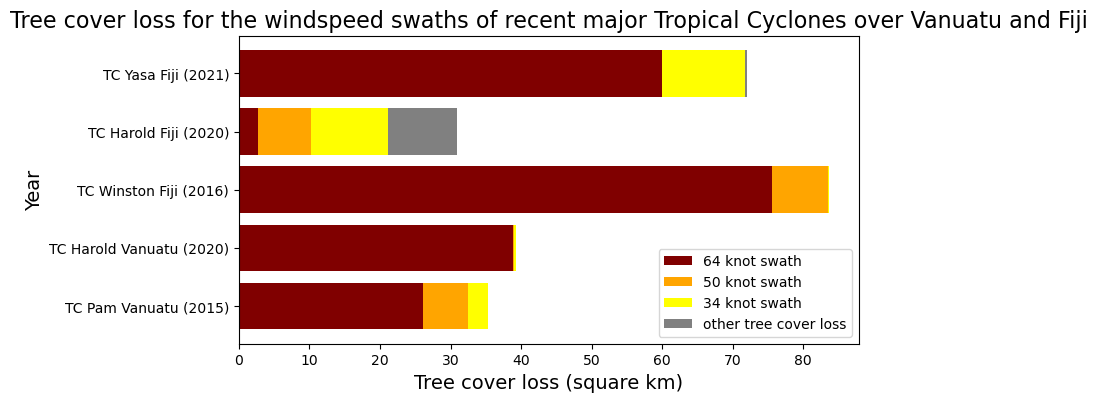

In [32]:
# Set index
concatenated_df.set_index('Tropical Cyclone', inplace=True)

# List of colors for each bar
colors = ['maroon', 'orange', 'yellow', 'grey']

# Plot the bar chart with specific colors for each bar
ax = concatenated_df.plot(kind='barh', color=colors, y=['64 knot swath', '50 knot swath','34 knot swath', 'other tree cover loss'], stacked=True, width=0.8, figsize=(8, 4), legend=True)

# Set title and labels
ax.set_title('Tree cover loss for the windspeed swaths of recent major Tropical Cyclones over Vanuatu and Fiji', fontsize=16)
ax.set_xlabel('Tree cover loss (square km)', fontsize=14)
ax.set_ylabel('Year', fontsize=14)

# Display the plot
plt.show()

In [33]:
concatenated_df.to_excel("combined_figures.xlsx")

In [34]:
concatenated_df.drop(['Year'], axis=1)

,64 knot swath,50 knot swath,34 knot swath,other tree cover loss
Tropical Cyclone,,,,
TC Pam Vanuatu (2015),26.125647,6.356373,2.813310,0.000000
TC Harold Vanuatu (2020),38.829792,0.156586,0.243863,0.000000
TC Winston Fiji (2016),75.585289,7.962731,0.174582,0.007398
TC Harold Fiji (2020),2.641477,7.636959,10.839430,9.830570
TC Yasa Fiji (2021),60.055067,0.000000,11.646892,0.288041
